In [81]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import imageio
from random import random

# Загрузка изображения

(540, 405, 3)

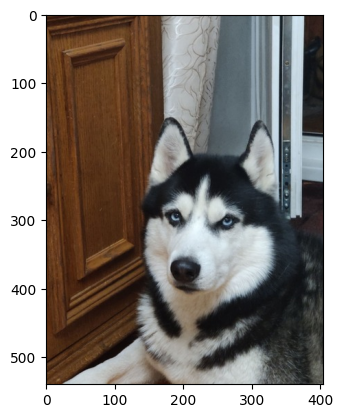

In [82]:
input_image = cv2.imread("C:\\Users\\mark0wka\\Downloads\\dog.jpg")
demonstration_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(demonstration_image)
input_image.shape

# Convolution (5 фильтров размером 3x3x3)

In [83]:
image = input_image
image_rows, image_columns, image_channels = image.shape

filters = np.random.uniform(size = (5, 3, 3, 3))
N, filter_rows, filter_columns, filter_channels = filters.shape

result = np.zeros((image_rows, image_columns, N), 'float')
B = [random() for i in range(N)]

for row in range(image_rows):
    for column in range(image_columns):
        for n in range(N):
            result[row][column][n] = B[n]
            for filter_channel in range(filter_channels):
                for filter_column in range(filter_columns):
                    for filter_row in range(filter_rows):
                        if (row + filter_row < image_rows) and (column + filter_column < image_columns):                        
                            result[row][column][n] += np.dot(filters[n][filter_row][filter_column][filter_channel], image[row + filter_row][column + filter_column][filter_channel])

print(f"{result.shape}\n{result}")

(540, 405, 5)
[[[1087.44372474 1326.98595839 1105.03241248 1120.54768004 1086.12984056]
  [1076.68543262 1308.14245439 1097.51480128 1110.85766176 1067.61207038]
  [1071.58597797 1309.14757215 1098.22555371 1109.44911956 1056.9247278 ]
  ...
  [ 435.73589416  529.2032266   426.36351664  450.42555283  437.85531541]
  [ 256.75543349  347.32506957  274.34853822  314.76762236  224.59323489]
  [ 145.33192425  164.96764058  114.40625896  110.19643882  133.28763107]]

 [[ 940.75098931 1143.90982873  962.6998281   962.13193583  925.93295066]
  [ 909.61925366 1110.10207295  936.16124964  938.29042671  901.65760441]
  [ 900.34066176 1103.59517861  931.98309309  939.96337401  884.43924547]
  ...
  [ 430.88134015  523.35336383  423.08755722  446.06749979  432.75537993]
  [ 253.20699285  342.28525029  270.95224438  309.42064496  221.20267503]
  [ 142.41849941  161.5789122   112.50045275  107.79620122  130.02465419]]

 [[ 767.43728043  935.7305013   786.66769991  786.66150179  752.65757009]
  [ 731.

# Нормализация

In [84]:
image = result
image_rows, image_columns, image_channels = image.shape

result = np.zeros((image_rows, image_columns, image_channels), 'float')

random_a = [random() for i in range(5)]
random_b = [random() for i in range(5)]
for channel in range(image_channels):
    mean = np.mean(image[:,:,channel])
    std = np.std(image[:,:,channel])
    result[:,:,channel] = (random_a[channel] * (image[:,:,channel] - mean) / std) + random_b[channel]

print(f"{result.shape}\n{result}")

(540, 405, 5)
[[[ 0.42233827  0.38193432  0.9296361   0.57626917  0.46758328]
  [ 0.41528196  0.37427836  0.92848672  0.57502661  0.45321214]
  [ 0.41193726  0.37468673  0.92859539  0.57484599  0.44491798]
  ...
  [-0.00511374  0.05780201  0.82587359  0.49033905 -0.03552504]
  [-0.12250616 -0.01609353  0.80263183  0.47294357 -0.20103197]
  [-0.1955883  -0.0901838   0.77817806  0.44671129 -0.27189178]]

 [[ 0.32612322  0.30755205  0.9078747   0.55595543  0.34325881]
  [ 0.30570406  0.29381625  0.90381718  0.55289822  0.32441937]
  [ 0.29961828  0.29117255  0.90317838  0.55311275  0.31105667]
  ...
  [-0.00829782  0.05542526  0.82537272  0.48978022 -0.03948296]
  [-0.12483356 -0.01814117  0.80211257  0.47225792 -0.20366329]
  [-0.1974992  -0.09156061  0.77788668  0.44640351 -0.27442409]]

 [[ 0.2124476   0.22297057  0.88096093  0.53345477  0.20878447]
  [ 0.18875811  0.20855679  0.87692102  0.53029824  0.19470443]
  [ 0.18304476  0.20646176  0.87681006  0.53034485  0.18368958]
  ...
  [-

# ReLu 

In [85]:
image = result
image_rows, image_columns, image_channels = image.shape

result = np.zeros((image_rows, image_columns, image_channels), 'float')

for row in range(image_rows):
    for column in range(image_columns):
        for channel in range(image_channels):    
            result[row][column][channel] = np.maximum(0, image[row][column][channel])

print(f"{result.shape}\n{result}")

(540, 405, 5)
[[[0.42233827 0.38193432 0.9296361  0.57626917 0.46758328]
  [0.41528196 0.37427836 0.92848672 0.57502661 0.45321214]
  [0.41193726 0.37468673 0.92859539 0.57484599 0.44491798]
  ...
  [0.         0.05780201 0.82587359 0.49033905 0.        ]
  [0.         0.         0.80263183 0.47294357 0.        ]
  [0.         0.         0.77817806 0.44671129 0.        ]]

 [[0.32612322 0.30755205 0.9078747  0.55595543 0.34325881]
  [0.30570406 0.29381625 0.90381718 0.55289822 0.32441937]
  [0.29961828 0.29117255 0.90317838 0.55311275 0.31105667]
  ...
  [0.         0.05542526 0.82537272 0.48978022 0.        ]
  [0.         0.         0.80211257 0.47225792 0.        ]
  [0.         0.         0.77788668 0.44640351 0.        ]]

 [[0.2124476  0.22297057 0.88096093 0.53345477 0.20878447]
  [0.18875811 0.20855679 0.87692102 0.53029824 0.19470443]
  [0.18304476 0.20646176 0.87681006 0.53034485 0.18368958]
  ...
  [0.         0.05397861 0.82492386 0.48917928 0.        ]
  [0.         0.    

# MaxPooling (2x2)

In [86]:
image = result
image_rows, image_columns, image_channels = image.shape

half_rows = int(image_rows / 2)
half_columns = int(image_columns / 2)

result = np.zeros((half_rows, half_columns, 5),'float')

for row in range(half_rows):
    for column in range(half_columns):
        for channel in range(image_channels):    
            result[row, column, channel] = max(image[row * 2, column * 2, channel], image[row * 2, column * 2 + 1, channel], image[row * 2 + 1, column * 2, channel], image[row * 2 + 1, column * 2 + 1, channel])

print(f"{result.shape}\n{result}")

(270, 202, 5)
[[[0.42233827 0.38193432 0.9296361  0.57626917 0.46758328]
  [0.41193726 0.37473952 0.9292061  0.57484599 0.45381657]
  [0.41242073 0.37598903 0.93068145 0.57567614 0.45580064]
  ...
  [0.0283847  0.08068906 0.83211052 0.49675625 0.        ]
  [0.00500036 0.06524173 0.82766394 0.49246371 0.        ]
  [0.         0.05780201 0.82587359 0.49033905 0.        ]]

 [[0.2124476  0.22297057 0.88096093 0.53345477 0.20878447]
  [0.18304476 0.20646176 0.87681006 0.53034485 0.18368958]
  [0.16228141 0.19040998 0.87270294 0.52499339 0.16040372]
  ...
  [0.03970444 0.08845397 0.83471534 0.49892271 0.01504763]
  [0.02012081 0.07575921 0.83089334 0.49523975 0.        ]
  [0.         0.05439547 0.82492386 0.48917928 0.        ]]

 [[0.01430855 0.07878123 0.83831843 0.49335374 0.        ]
  [0.00369478 0.07101416 0.83537865 0.49157522 0.        ]
  [0.         0.06205656 0.83231607 0.48898162 0.        ]
  ...
  [0.04040642 0.09167774 0.83589408 0.49970903 0.01945879]
  [0.02217643 0.0771

# Попиксельный SoftMax

In [87]:
image = result
image_rows, image_columns, image_channels = image.shape

result = np.zeros((image_rows, image_columns, image_channels), 'float')
    
for row in range(image_rows):
    for column in range(image_columns):
        temp = 0
        for channel in range(image_channels):
            temp += math.exp(image[row, column, channel])
        for channel1 in range(image_channels):
            result[row, column, channel1] = math.exp(image[row, column, channel1]) / temp

print(f"{result.shape}\n{result}")

(270, 202, 5)
[[[0.17141212 0.16462444 0.2846808  0.19993686 0.17934579]
  [0.17063031 0.16439985 0.28622211 0.2008198  0.17792793]
  [0.17050297 0.16440305 0.28629233 0.20073951 0.17806214]
  ...
  [0.14583744 0.15366838 0.32577872 0.23295938 0.14175608]
  [0.14364016 0.15255919 0.3270048  0.23387216 0.1429237 ]
  [0.14334349 0.15187317 0.32737861 0.23406124 0.14334349]]

 [[0.15780906 0.15947845 0.30793821 0.21754223 0.15723204]
  [0.15525982 0.15893845 0.31071164 0.21973012 0.15535997]
  [0.15387639 0.15826617 0.3131152  0.22115451 0.15358773]
  ...
  [0.14656517 0.15388718 0.32456346 0.23198865 0.14299553]
  [0.14502956 0.15332747 0.32626505 0.23323732 0.14214061]
  [0.14350113 0.15152314 0.32742754 0.23404706 0.14350113]]

 [[0.14395647 0.15354346 0.32816641 0.23242234 0.14191133]
  [0.14302074 0.15298028 0.32854491 0.23296078 0.14249329]
  [0.14299373 0.15214855 0.32869059 0.2331734  0.14299373]
  ...
  [0.14640496 0.1541071  0.3243633  0.23175461 0.14337002]
  [0.14520931 0.1534